## Extracting features with SIFT (Scale-Invariant Feature Transformation)

In [1]:
#using python 2.7 for this since openCV feature extractor partly deprecated in python 3.x
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt

In [48]:
img_original = cv2.cvtColor(cv2.imread('sample_cat.jpg'), cv2.COLOR_BGR2RGB)

In [55]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img_shifted = shifted(img_gray)

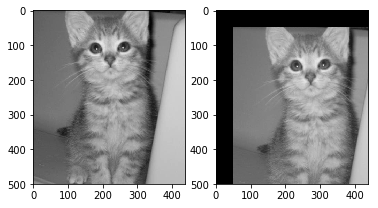

In [56]:
figure, ax = plt.subplots(1,2)
ax[0].imshow(img_gray,cmap='gray')
ax[1].imshow(img_shifted,cmap='gray')
plt.show()

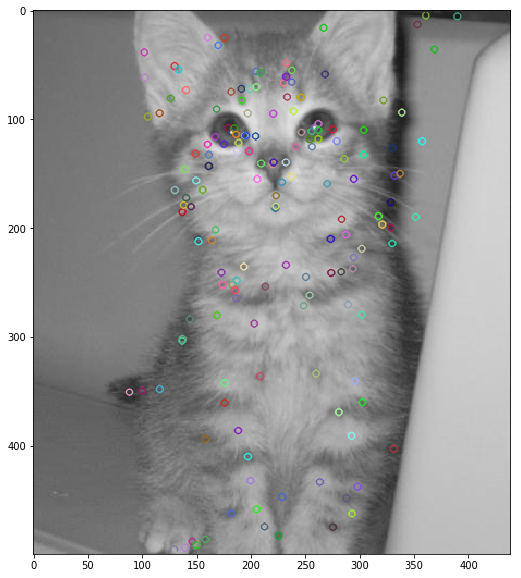

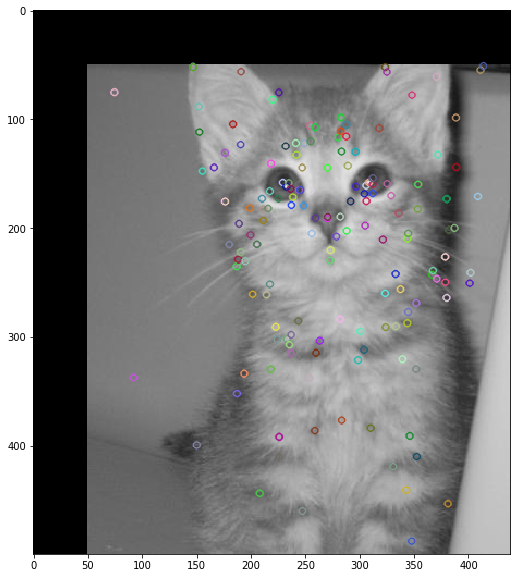

In [58]:
kp1, desc1 = create_features(img_gray)
kp2, desc2 = create_features(img_shifted)

display_features(img_gray, img_original, kp1)
display_features(img_shifted, img_original, kp2)

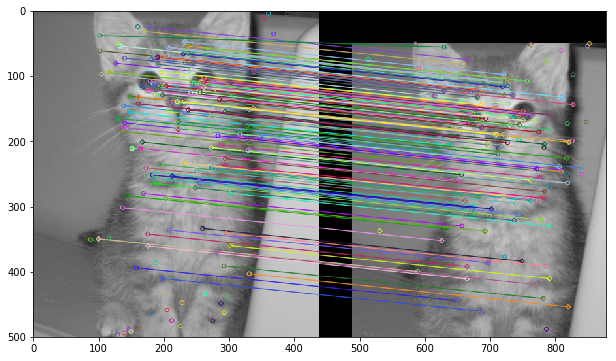

In [67]:
feature_matching(img_gray,img_shifted)

### Bag of Words : a short digression


*(visualizations from lecture at CS Department at NY University)*

<img src="Bild1.png" width="400">

<img src="Bild2.png" width="700">

### Helper Functions

In [54]:
def shifted(img):
    rows, cols = img.shape
    M_shift = np.float32([[1,0,50],[0,1,50]])
    return cv2.warpAffine(img, M_shift,(cols,rows))

In [47]:
def create_features(img):
    sift = cv2.xfeatures2d.SIFT_create()
    # descriptors == 128-dim vectors
    kp, desc = sift.detectAndCompute(img, None)
    return kp, desc

def display_features(img, original_img, kp):
    plt.figure(figsize=(10,10))
    plt.imshow(cv2.drawKeypoints(img, kp, original_img.copy()))
    plt.show()

In [66]:
def feature_matching(img1, img2):
    kp1, desc1 = create_features(img1)
    kp2, desc2 = create_features(img2)
    #brute-force method
    matcher = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    matches = matcher.match(desc1, desc2)
    #sorting matches in ascending distance order
    matches = sorted(matches, key = lambda x:x.distance)
    #draw 120 best matches
    result = cv2.drawMatches(img1,kp1,img2,kp2,matches[:150],img_shifted.copy(),flags=0)
    plt.figure(figsize=(12,6))
    plt.imshow(result)
    plt.show()